<a href="https://colab.research.google.com/github/Psssshs/Data_visualization/blob/main/6252%20dv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df_matches = pd.read_csv('/matches.csv')

In [ ]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
print('Shape of matches data',df_matches.shape)

Shape of matches data (756, 18)


In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df_matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Text(0.5, 1.0, 'Number of matches played in each IPL season')

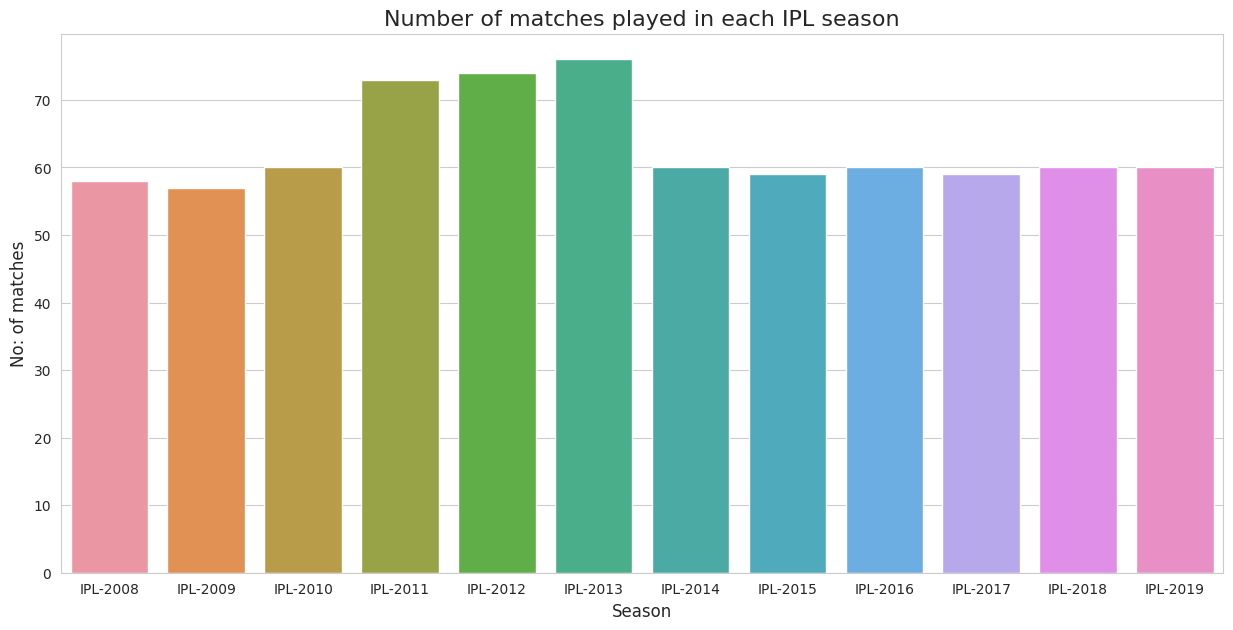

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=df_matches,
              order = df_matches['Season'].value_counts().index.sort_values()
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

Text(0.5, 1.0, 'Matches won by the Teams')

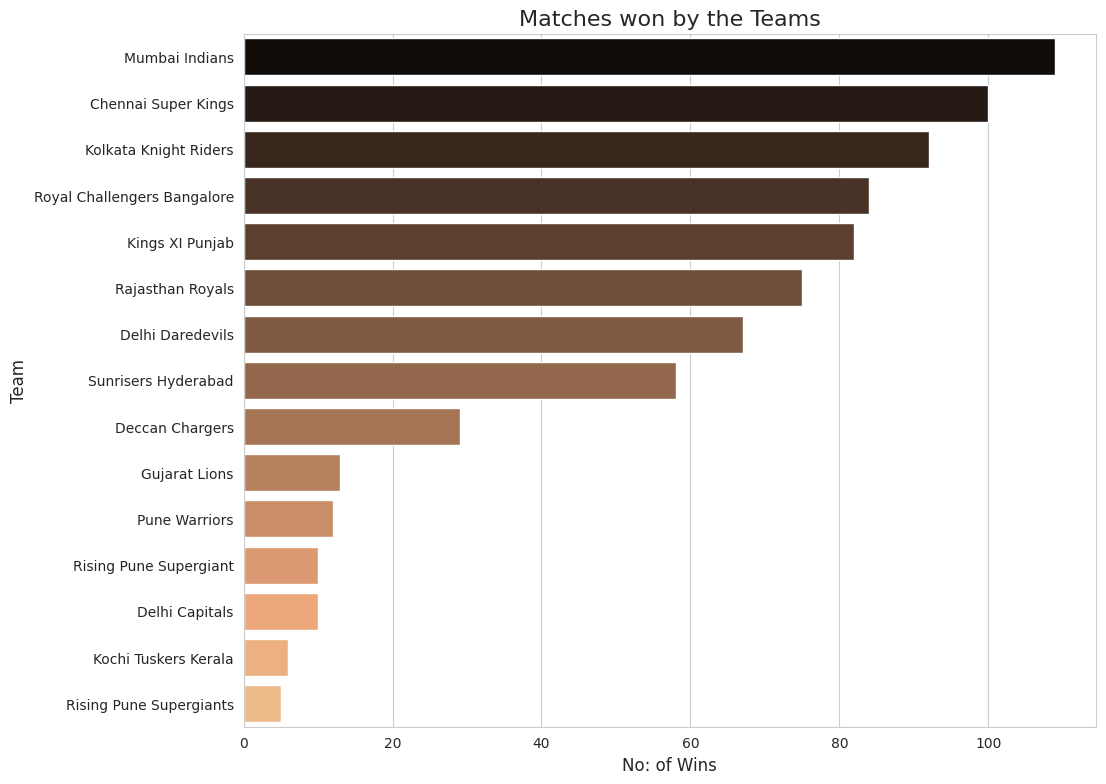

In [ ]:
# Matches won by the Teams
plt.figure(figsize = (11,9))
sns.countplot(y = 'winner',
              data = df_matches,
              order= df_matches['winner'].value_counts().index,
              palette = 'copper' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

Text(0.5, 1.0, 'Number of matches played in each Stadium')

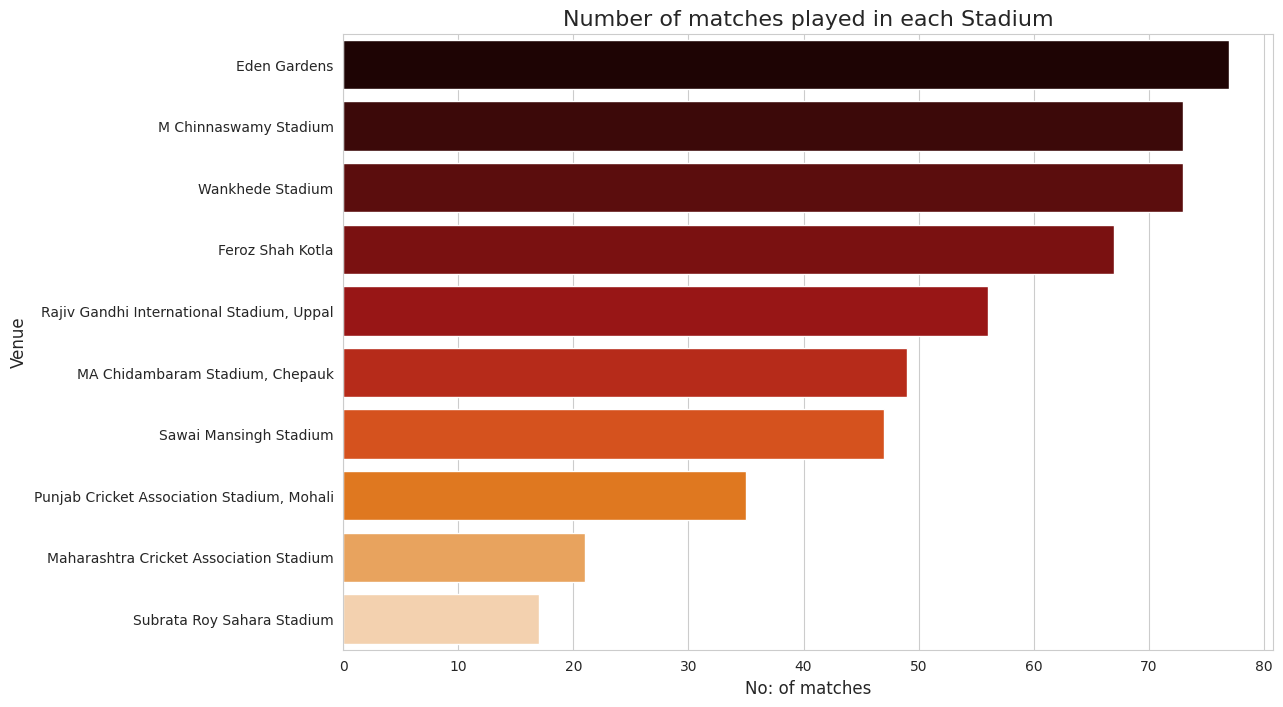

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'venue',
              data = df_matches,
              order = df_matches['venue'].value_counts().iloc[:10].index,
              palette='gist_heat')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Number of matches played in each Stadium',fontsize=16)

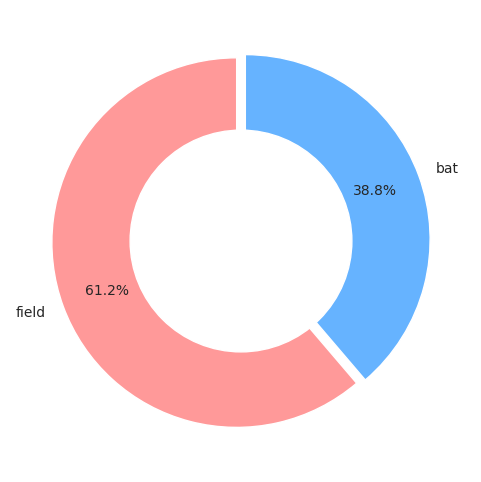

In [ ]:
plt.figure(figsize=(6,6))
sizes = df_matches.toss_decision.value_counts()
labels = df_matches.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

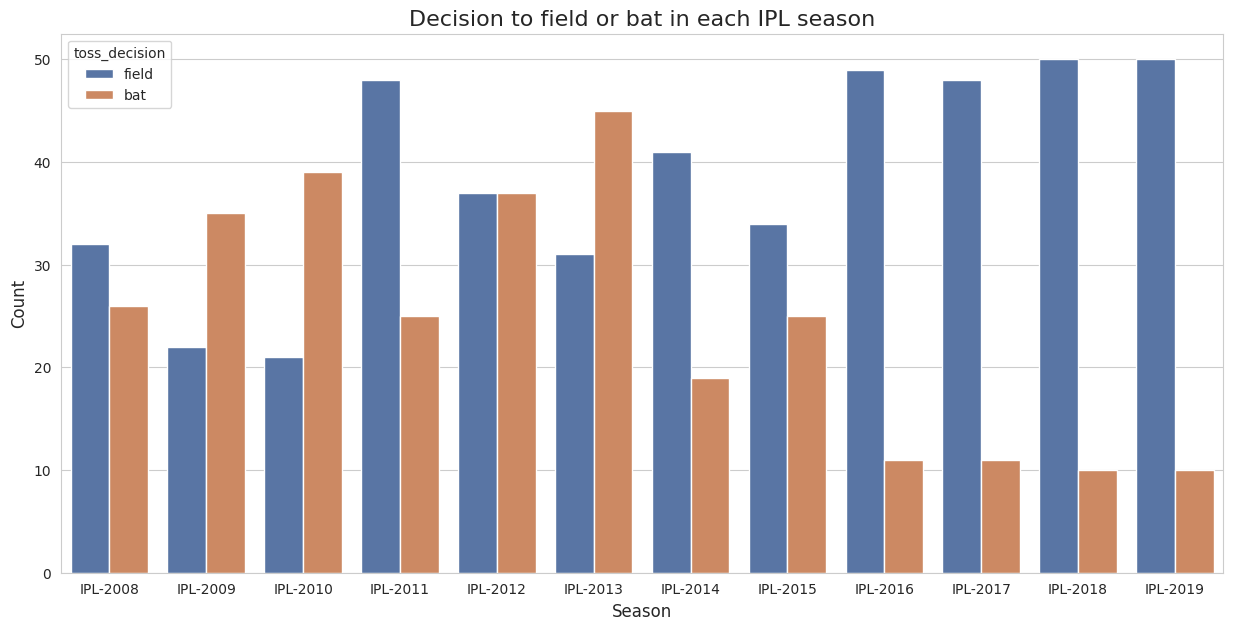

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              hue='toss_decision',
              data=df_matches,
              order = df_matches['Season'].value_counts().index.sort_values(),
              palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

In [ ]:
plt.figure(figsize=(15,7))
player_of_match=df_matches['player_of_match'].value_counts()[:10]
sns.countplot(player_of_match.index,
            player_of_match.values,
            palette='cividis')

plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count',fontsize=12)

TypeError: ignored

<Figure size 1500x700 with 0 Axes>

In [ ]:
Matches=pd.read_csv('/matches.csv')
Matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
Players=pd.read_excel('/Players.xlsx')
Players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


In [ ]:
SR=pd.read_csv('/most_runs_average_strikerate.csv')
SR

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [ ]:
Deliveries=pd.read_csv('/deliveries.csv')
Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
Teams=pd.read_csv('/teams.csv')
Teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [ ]:
teamwise_home_away=pd.read_csv('/teamwise_home_and_away.csv')
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [ ]:
teamwise_home_away['team'].replace('Pune Warriors',0,inplace=True)
teamwise_home_away['team'].replace('Kolkata Knight Riders',1,inplace=True)
teamwise_home_away['team'].replace('Rajasthan Royals',2,inplace=True)
teamwise_home_away['team'].replace('Kochi Tuskers Kerala',3,inplace=True)
teamwise_home_away['team'].replace('Gujarat Lions',4,inplace=True)
teamwise_home_away['team'].replace('Chennai Super Kings',5,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiants',6,inplace=True)
teamwise_home_away['team'].replace('Delhi Daredevils',7,inplace=True)
teamwise_home_away['team'].replace('Deccan Chargers',8,inplace=True)
teamwise_home_away['team'].replace('Delhi Capitals',9,inplace=True)
teamwise_home_away['team'].replace('Mumbai Indians',10,inplace=True)
teamwise_home_away['team'].replace('Sunrisers Hyderabad',11,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiant',12,inplace=True)
teamwise_home_away['team'].replace('Royal Challengers Bangalore',13,inplace=True)
teamwise_home_away['team'].replace('Kings XI Punjab',14,inplace=True)
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,12,5,5,8,8,62.500000,62.500000
1,10,58,51,101,86,57.425743,59.302326
2,5,51,49,89,75,57.303371,65.333333
3,9,3,7,6,10,50.000000,70.000000
4,11,30,28,63,45,47.619048,62.222222
5,2,29,46,67,80,43.283582,57.500000
6,8,18,11,43,32,41.860465,34.375000
7,14,38,44,91,85,41.758242,51.764706
8,13,35,49,85,95,41.176471,51.578947
9,1,34,58,83,95,40.963855,61.052632


In [ ]:
Deliveries['batting_team'].replace('Pune Warriors',0,inplace=True)
Deliveries['batting_team'].replace('Kolkata Knight Riders',1,inplace=True)
Deliveries['batting_team'].replace('Rajasthan Royals',2,inplace=True)
Deliveries['batting_team'].replace('Kochi Tuskers Kerala',3,inplace=True)
Deliveries['batting_team'].replace('Gujarat Lions',4,inplace=True)
Deliveries['batting_team'].replace('Chennai Super Kings',5,inplace=True)
Deliveries['batting_team'].replace('Rising Pune Supergiants',6,inplace=True)
Deliveries['batting_team'].replace('Delhi Daredevils',7,inplace=True)
Deliveries['batting_team'].replace('Deccan Chargers',8,inplace=True)
Deliveries['batting_team'].replace('Delhi Capitals',9,inplace=True)
Deliveries['batting_team'].replace('Mumbai Indians',10,inplace=True)
Deliveries['batting_team'].replace('Sunrisers Hyderabad',11,inplace=True)
Deliveries['batting_team'].replace('Rising Pune Supergiant',12,inplace=True)
Deliveries['batting_team'].replace('Royal Challengers Bangalore',13,inplace=True)
Deliveries['batting_team'].replace('Kings XI Punjab',14,inplace=True)

Deliveries['bowling_team'].replace('Pune Warriors',0,inplace=True)
Deliveries['bowling_team'].replace('Kolkata Knight Riders',1,inplace=True)
Deliveries['bowling_team'].replace('Rajasthan Royals',2,inplace=True)
Deliveries['bowling_team'].replace('Kochi Tuskers Kerala',3,inplace=True)
Deliveries['bowling_team'].replace('Gujarat Lions',4,inplace=True)
Deliveries['bowling_team'].replace('Chennai Super Kings',5,inplace=True)
Deliveries['bowling_team'].replace('Rising Pune Supergiants',6,inplace=True)
Deliveries['bowling_team'].replace('Delhi Daredevils',7,inplace=True)
Deliveries['bowling_team'].replace('Deccan Chargers',8,inplace=True)
Deliveries['bowling_team'].replace('Delhi Capitals',9,inplace=True)
Deliveries['bowling_team'].replace('Mumbai Indians',10,inplace=True)
Deliveries['bowling_team'].replace('Sunrisers Hyderabad',11,inplace=True)
Deliveries['bowling_team'].replace('Rising Pune Supergiant',12,inplace=True)
Deliveries['bowling_team'].replace('Royal Challengers Bangalore',13,inplace=True)
Deliveries['bowling_team'].replace('Kings XI Punjab',14,inplace=True)

Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,11,13,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,11,13,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,11,13,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,11,13,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,11,13,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,5,10,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,5,10,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,5,10,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,5,10,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
# checking if there's any data leakages


#Matches
mm=len(Matches==np.NaN)
#team_home_away_performance
ha=len(teamwise_home_away==np.NaN)
#Deliveries
d=len(Deliveries==np.NaN)

print(mm,ha,d)

756 14 179078


In [ ]:
def non_num_data(df):
    columns=df.columns.values

    for column in columns:
        text_digit_vals={}
        def con_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(con_to_int,df[column]))
    return df

In [ ]:
print(non_num_data(teamwise_home_away))
print(non_num_data(Matches))
print(non_num_data(Deliveries))

    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

In [ ]:
print(teamwise_home_away)
print(Matches)
print(Deliveries)

    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

<BarContainer object of 14 artists>

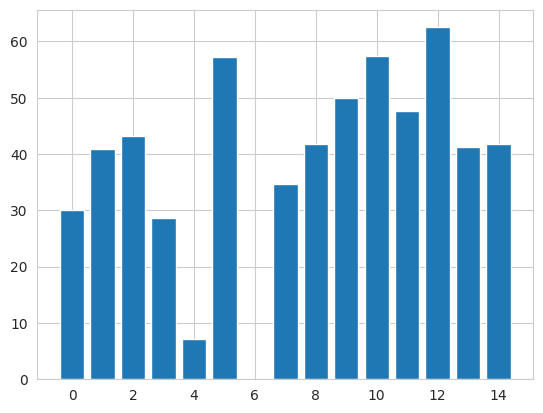

In [ ]:
y1=teamwise_home_away['home_win_percentage']
x1=teamwise_home_away['team']
plt.bar(x1,y1)

<BarContainer object of 14 artists>

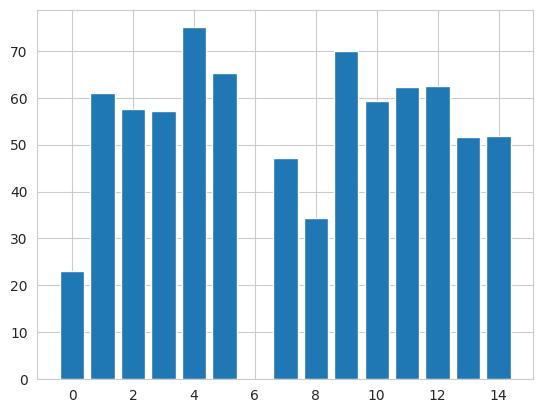

In [ ]:
y2=teamwise_home_away['away_win_percentage']
x2=teamwise_home_away['team']
plt.bar(x2,y2)

<BarContainer object of 14 artists>

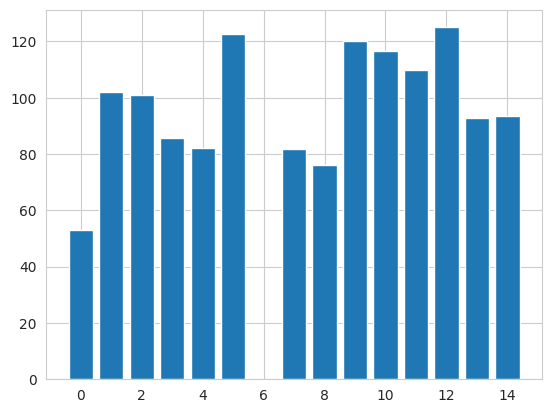

In [ ]:
y_tot=y1+y2
x_tot=x2
plt.bar(x_tot,y_tot)

In [ ]:
home_matches=Matches[Matches['team1']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  1.0
percentage of choosing field after winning the toss at home ground:  0.0


In [ ]:
home_matches=Matches[Matches['team2']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  0.0
percentage of choosing field after winning the toss at home ground:  1.0


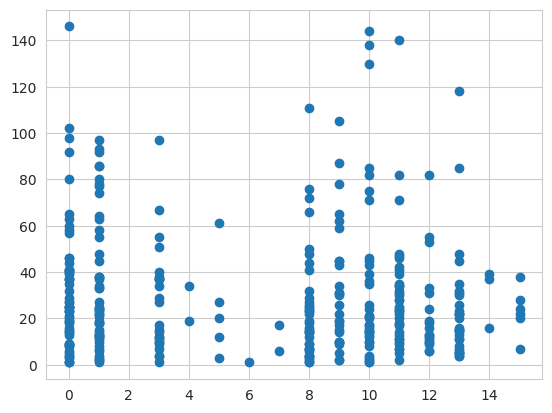

In [ ]:
win_df=Matches[Matches['win_by_runs']!=0]
team_won1=win_df['winner']
by_runs=win_df['win_by_runs']
plt.scatter(team_won1,by_runs)

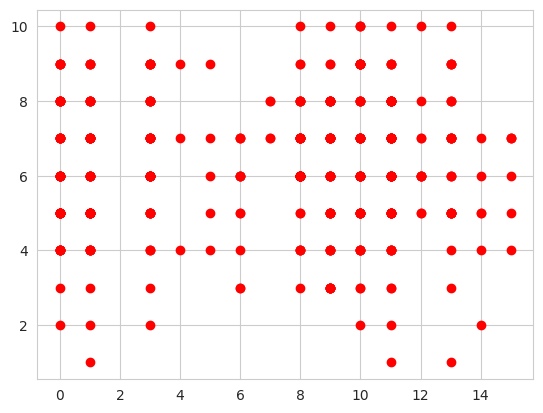

In [ ]:
wick_df=Matches[Matches['win_by_wickets']!=0]
team_won2=wick_df['winner']
wick=wick_df['win_by_wickets']
plt.scatter(team_won2,wick,color='r')

In [ ]:
print('Average win wicket trail')
for i in range(15):
    val1=wick_df[wick_df['winner']==i]
    tot_run1=sum(val1['win_by_wickets'])
    print(team[i],'---',tot_run1//len(val1))


Average win wicket trail
Pune Warriors --- 6
Kolkata Knight Riders --- 6


ZeroDivisionError: ignored

([<matplotlib.patches.Wedge at 0x7e1df108b6d0>,
 [Text(-0.25208530194380285, 1.0707254552610121, 'Pune Warriors'),
  Text(-0.7274214013942623, 0.8251412635383155, 'Kolkata Knight Riders'),
  Text(-1.0980655239102493, 0.06520816819777885, 'Rajasthan Royals'),
  Text(-1.0429955904726222, -0.34951423183422176, 'Kochi Tuskers Kerala'),
  Text(-1.0074665824460889, -0.4416005947169885, 'Gujarat Lions'),
  Text(-0.6425867611910884, -0.8927946316717789, 'Chennai Super Kings'),
  Text(0.18076925003876448, -1.08504491991826, 'Delhi Daredevils'),
  Text(0.6378915260411488, -0.8961553442372001, 'Deccan Chargers'),
  Text(0.7912737562269319, -0.764124232508381, 'Delhi Capitals'),
  Text(1.0767954319083635, -0.22474785387469473, 'Mumbai Indians'),
  Text(0.918189594840797, 0.6057457122638948, 'Sunrisers Hyderabad'),
  Text(0.6799542543197061, 0.8646746278413241, 'Rising Pune Supergiant'),
  Text(0.24252079322485975, 1.072932274122456, 'Royal Challengers Bangalore')])

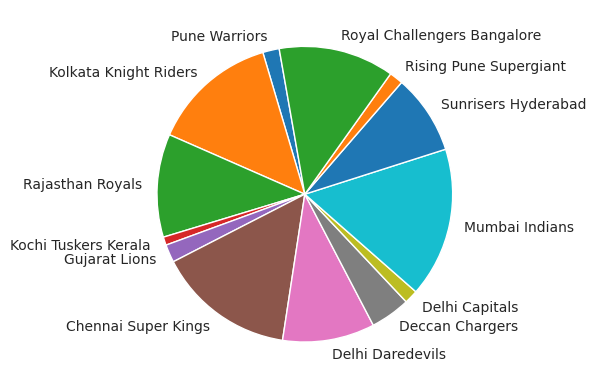

In [ ]:
wins=[]
team_1=[]
tot_wins=sum(teamwise_home_away['home_wins']+teamwise_home_away['away_wins'])
for i in range(14):
    val2=teamwise_home_away[teamwise_home_away['team']==i]
    if i!=6:
        wins.append(int(val2['home_wins']+val2['away_wins']))
        team_1.append(team[i])
plt.pie(wins,labels=team_1,startangle=100)

<BarContainer object of 50 artists>

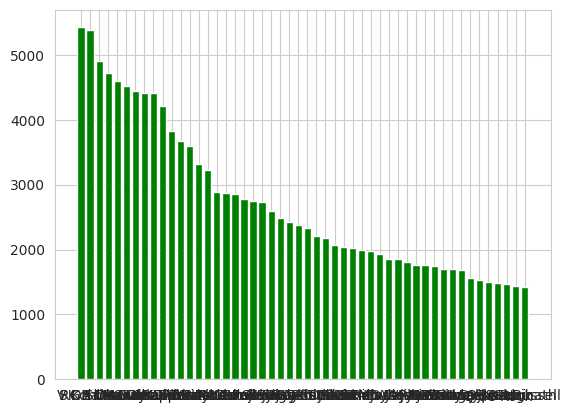

In [ ]:
btmn=SR['batsman'].head(50)
tot_runs1=SR['total_runs'].head(50)
plt.bar(btmn,tot_runs1,label=np.array(50),color='g')

([<matplotlib.patches.Wedge at 0x7e1df0cee440>,
 [Text(-0.6969036293582092, 0.8510730470337762, 'Pune Warriors'),
  Text(-0.9897726535262985, 0.4799480121133019, 'Kolkata Knight Riders'),
  Text(-1.084530054990446, -0.18383296718059153, 'Rajasthan Royals'),
  Text(-0.9906005398466936, -0.4782369396600804, 'Kochi Tuskers Kerala'),
  Text(-0.9492840419242845, -0.5557515701713253, 'Gujarat Lions'),
  Text(-0.6272957463199607, -0.9036039213332818, 'Chennai Super Kings'),
  Text(-0.22492083415996147, -1.076759313106131, 'Rising Pune Supergiants'),
  Text(0.14017540469950904, -1.0910320141578473, 'Delhi Daredevils'),
  Text(0.6110614285554433, -0.9146605548135227, 'Deccan Chargers'),
  Text(0.7704652580395598, -0.7851008127330111, 'Delhi Capitals'),
  Text(1.0372611969917405, -0.3661819345834277, 'Mumbai Indians'),
  Text(1.0547826480572586, 0.3121435012255057, 'Sunrisers Hyderabad'),
  Text(0.9507745053224482, 0.5531978308244293, 'Rising Pune Supergiant'),
  Text(0.5974723577066519, 0.92359

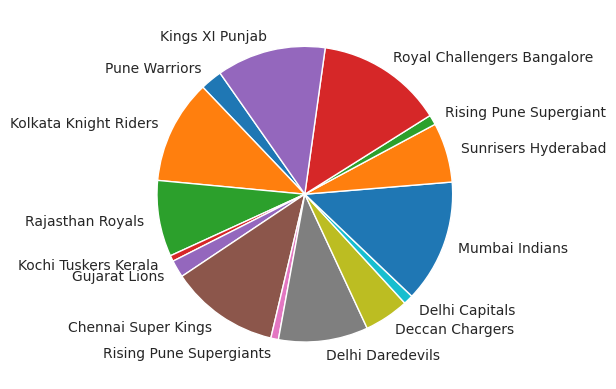

In [ ]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=6]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.pie(arr1,labels=team_temp,startangle=125)

([<matplotlib.patches.Wedge at 0x7e1df0d7cb50>,
 [Text(-0.701667334605075, 0.8471498991018117, 'Pune Warriors'),
  Text(-1.0033448975266277, 0.45088692219588844, 'Kolkata Knight Riders'),
  Text(-1.0611494661172456, -0.28976164438911695, 'Rajasthan Royals'),
  Text(-0.9042989965010921, -0.6262933217966786, 'Kochi Tuskers Kerala'),
  Text(-0.8395088802024533, -0.7107916994881294, 'Gujarat Lions'),
  Text(-0.4882085251369104, -0.9857243204789273, 'Chennai Super Kings'),
  Text(-0.10543448476649087, -1.0949354179229132, 'Rising Pune Supergiants'),
  Text(0.2852807058518915, -1.062362894150886, 'Delhi Daredevils'),
  Text(0.7434033149754863, -0.8107721697761081, 'Deccan Chargers'),
  Text(0.8798079096493581, -0.6602560428488535, 'Delhi Capitals'),
  Text(1.0765104694257543, -0.22610884373845816, 'Mumbai Indians'),
  Text(1.00657474778962, 0.4436296621195014, 'Sunrisers Hyderabad'),
  Text(0.8635470757537171, 0.6813856822367227, 'Rising Pune Supergiant'),
  Text(0.5364506305052875, 0.960323

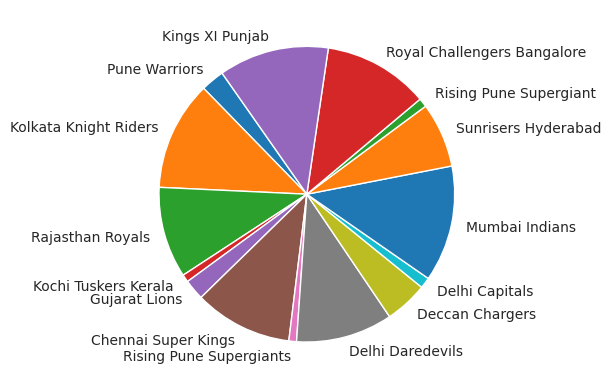

In [ ]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=5]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.pie(arr1,labels=team_temp,startangle=125)

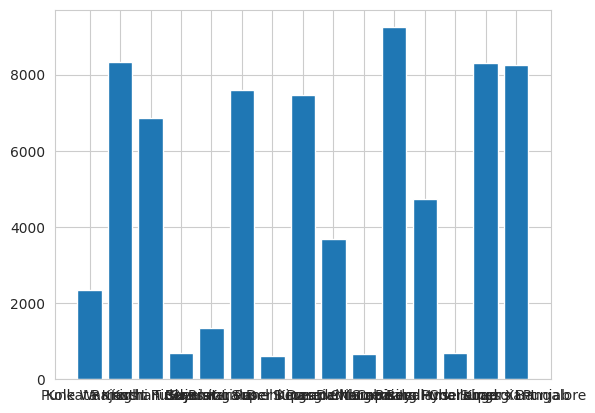

([<matplotlib.patches.Wedge at 0x7e1df0ca1780>,
 [Text(-0.3027556206970098, 1.0575155006600936, 'Pune Warriors'),
  Text(-0.7517931714285823, 0.8029987717259314, 'Kolkata Knight Riders'),
  Text(-1.0885140774030726, 0.15854684889753565, 'Rajasthan Royals'),
  Text(-1.0800874236445566, -0.20835344317976684, 'Kochi Tuskers Kerala'),
  Text(-1.0568348604374658, -0.30512305347862867, 'Gujarat Lions'),
  Text(-0.8566509517984298, -0.6900356126917251, 'Chennai Super Kings'),
  Text(-0.5547526169480959, -0.949868166636423, 'Rising Pune Supergiants'),
  Text(-0.18665603834879183, -1.0840477495700707, 'Delhi Daredevils'),
  Text(0.34989269079835056, -1.0428686901647255, 'Deccan Chargers'),
  Text(0.5426049521795507, -0.9568593762252778, 'Delhi Capitals'),
  Text(0.8979155007145929, -0.6354114836674437, 'Mumbai Indians'),
  Text(1.099989753754812, 0.00474780311599003, 'Sunrisers Hyderabad'),
  Text(1.0669564936803317, 0.26758893959461916, 'Rising Pune Supergiant'),
  Text(0.879122496998339, 0.66

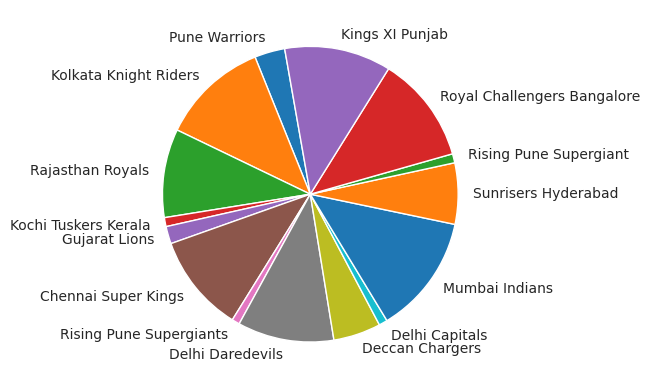

In [ ]:
arr1=[]
team_temp=[]
delv=Deliveries[Deliveries['batsman_runs']==0]
# delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.bar(team_temp,arr1)
plt.show()
plt.pie(arr1,labels=team_temp,startangle=100)

In [ ]:
max(Matches['Season'])

11

In [ ]:
ses=max(Matches['Season'])
for i in range(int(ses)):
    sess=Matches[Matches['Season']==i]
    for j in range(15):
        prt_tm=len(sess[sess['winner']==j])
        tot_mt=len(sess[sess['team1']==j])
        tot_mt+=len(sess[sess['team2']==j])
        if tot_mt !=0:
            print(team[j],'won :',prt_tm)
            print('effective win: ',prt_tm/tot_mt)
    print('\n')

Pune Warriors won : 13
effective win:  0.6842105263157895
Kolkata Knight Riders won : 12
effective win:  0.6666666666666666
Rajasthan Royals won : 0
effective win:  0.0
Delhi Daredevils won : 0
effective win:  0.0
Deccan Chargers won : 8
effective win:  0.4444444444444444
Delhi Capitals won : 11
effective win:  0.6875
Mumbai Indians won : 9
effective win:  0.5625
Rising Pune Supergiant won : 0
effective win:  0.0
Kings XI Punjab won : 0
effective win:  0.0


Pune Warriors won : 7
effective win:  0.5
Rajasthan Royals won : 0
effective win:  0.0
Kochi Tuskers Kerala won : 7
effective win:  0.5
Chennai Super Kings won : 0
effective win:  0.0
Delhi Daredevils won : 0
effective win:  0.0
Delhi Capitals won : 0
effective win:  0.0
Mumbai Indians won : 9
effective win:  0.6
Rising Pune Supergiant won : 0
effective win:  0.0


Pune Warriors won : 11
effective win:  0.6875
Kolkata Knight Riders won : 10
effective win:  0.5882352941176471
Delhi Daredevils won : 0
effective win:  0.0
Deccan Charg

In [ ]:
mi=[]
kkr=[]
csk=[]
for i in range(int(ses)):
    xx=Matches[Matches['Season']==i]
    mi.append(len(xx[xx['winner']==10])/(len(xx[xx['team1']==10])+len(xx[xx['team1']==10])))
    kkr.append(len(xx[xx['winner']==1])/(len(xx[xx['team1']==1])+len(xx[xx['team1']==1])))

    csk1=(len(xx[xx['team1']==5])+len(xx[xx['team1']==5]))
    if csk1!=0:
        csk.append(len(xx[xx['winner']==5])/(len(xx[xx['team1']==5])+len(xx[xx['team1']==5])))
    else:
        csk.append(int(0))
plt.title('performance in seasons')
plt.plot(mi,color='deepskyblue',label='MI')
plt.legend()
plt.plot(kkr,color='darkviolet',label='KKR')
plt.legend()
plt.plot(csk,color='gold',label='CSK')
plt.legend()
plt.show()

ZeroDivisionError: ignored

In [ ]:
xl = pd.read_excel('/Players.xlsx')
print(xl)
teams = pd.read_csv("/teams.csv")
deliveries = pd.read_csv("/deliveries.csv")
matches = pd.read_csv("/matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv("/teamwise_home_and_away.csv")
most_runs_average_strikerate = pd.read_csv("/most_runs_average_strikerate.csv")

        Player_Name        DOB Batting_Hand           Bowling_Skill   Country
0    A Ashish Reddy 1991-02-24   Right_Hand        Right-arm medium     India
1        A Chandila 1983-12-05   Right_Hand      Right-arm offbreak     India
2          A Chopra 1977-09-19   Right_Hand      Right-arm offbreak     India
3       A Choudhary        NaT   Right_hand    Left-arm fast-medium       NaN
4       A Dananjaya        NaT   Right_Hand      Right-arm offbreak       NaN
..              ...        ...          ...                     ...       ...
561     Younis Khan 1977-11-29   Right_Hand        Right-arm medium  Pakistan
562       YS Chahal 1990-07-23   Right_Hand         Legbreak googly     India
563    Yuvraj Singh 1981-12-12    Left_Hand  Slow left-arm orthodox     India
564     YV Takawale 1984-11-05   Right_Hand                     NaN     India
565          Z Khan 1978-10-07   Right_Hand    Left-arm fast-medium     India

[566 rows x 5 columns]


<ipython-input-55-82f22fd58751>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  matches = pd.read_csv("/matches.csv",parse_dates=['date'])


In [ ]:
print(teams.info())
print("No. of teams: ",teams['team1'].nunique())
teams['team1'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes
None
No. of teams:  15


array(['Pune Warriors', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Gujarat Lions', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Delhi Daredevils', 'Deccan Chargers',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kings XI Punjab'], dtype=object)

In [ ]:
print(deliveries.info())
deliveries.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
print(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
teamwise_home_and_away.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
print(teamwise_home_and_away.info())
teamwise_home_and_away.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

NameError: ignored

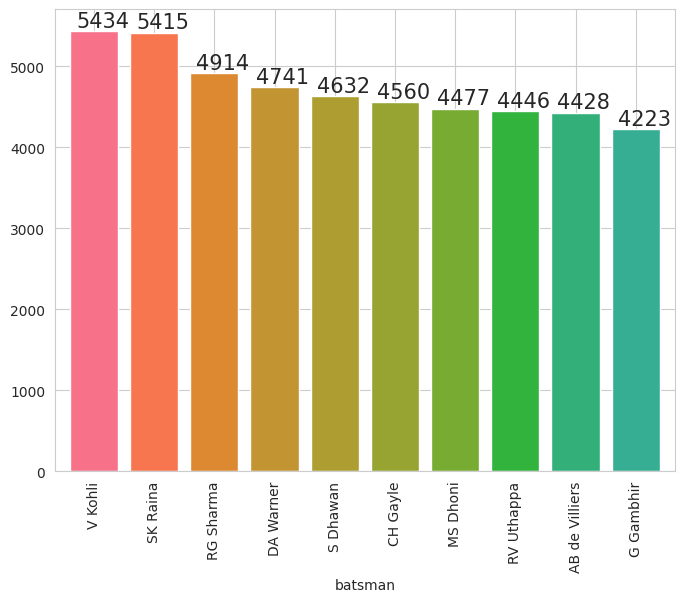

In [ ]:
plt.subplots(figsize=(8,6))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

ax=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

<ipython-input-63-ec0b1528897b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')


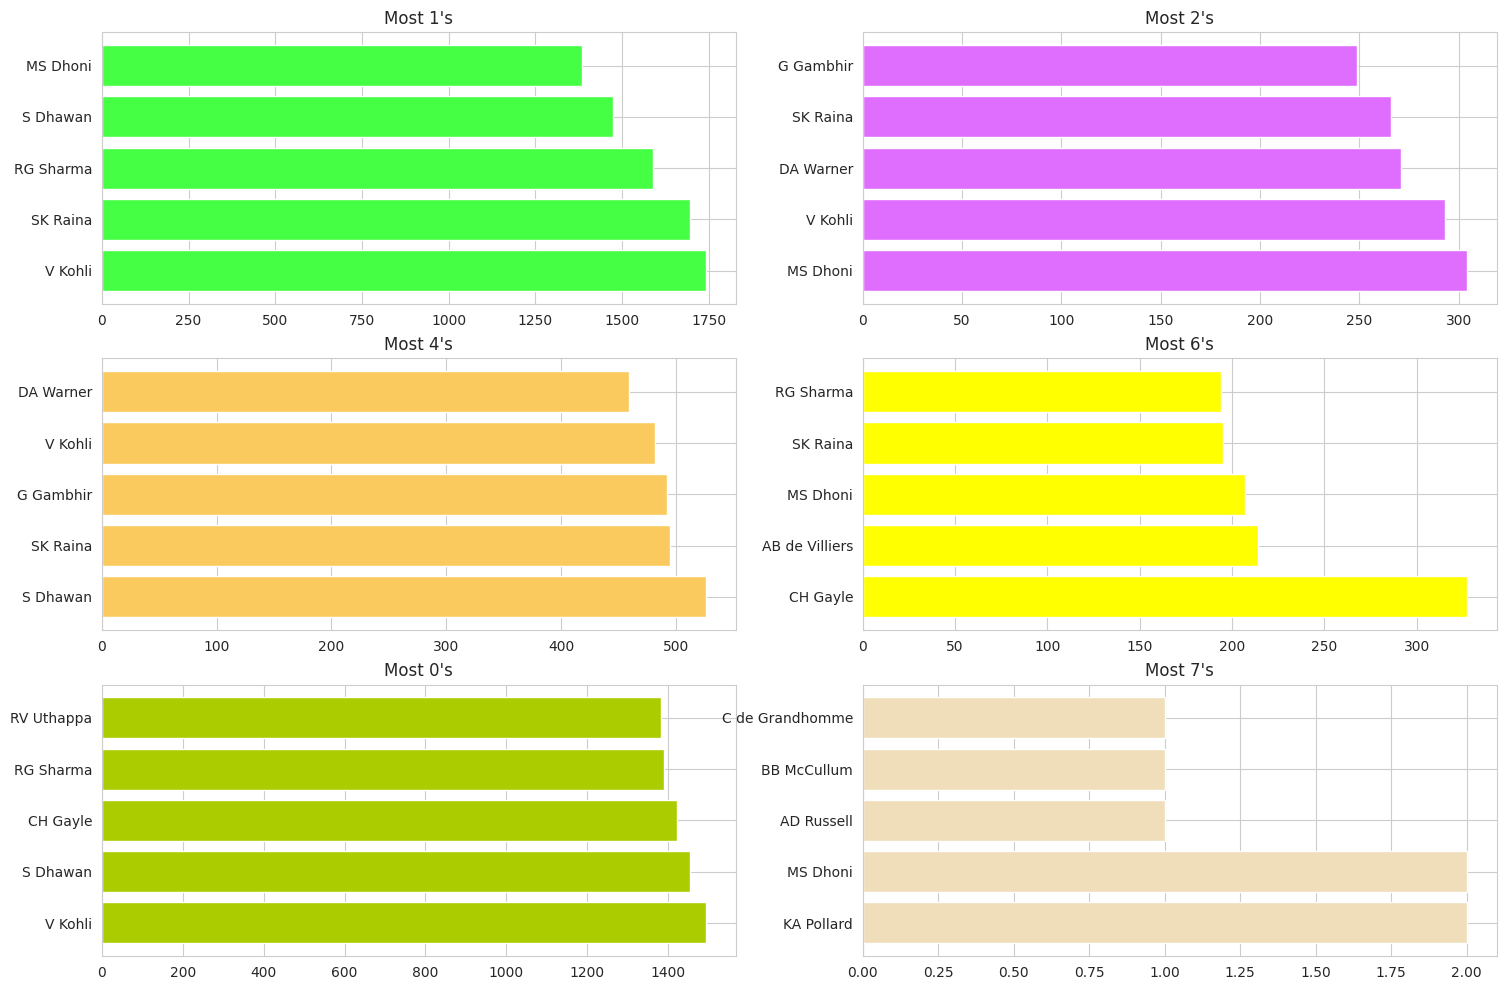

In [ ]:
top_batsman = deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')

fig,ax=plt.subplots(3,2,figsize=(18,12))
top_batsman[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
top_batsman[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
top_batsman[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
top_batsman[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
top_batsman[0].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,0],color='#abcd00',width=0.8)
ax[2,0].set_title("Most 0's")
ax[2,0].set_ylabel('')
top_batsman[7].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,1],color='#f0debb',width=0.8)
ax[2,1].set_title("Most 7's")
ax[2,1].set_ylabel('')
plt.show()

In [ ]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


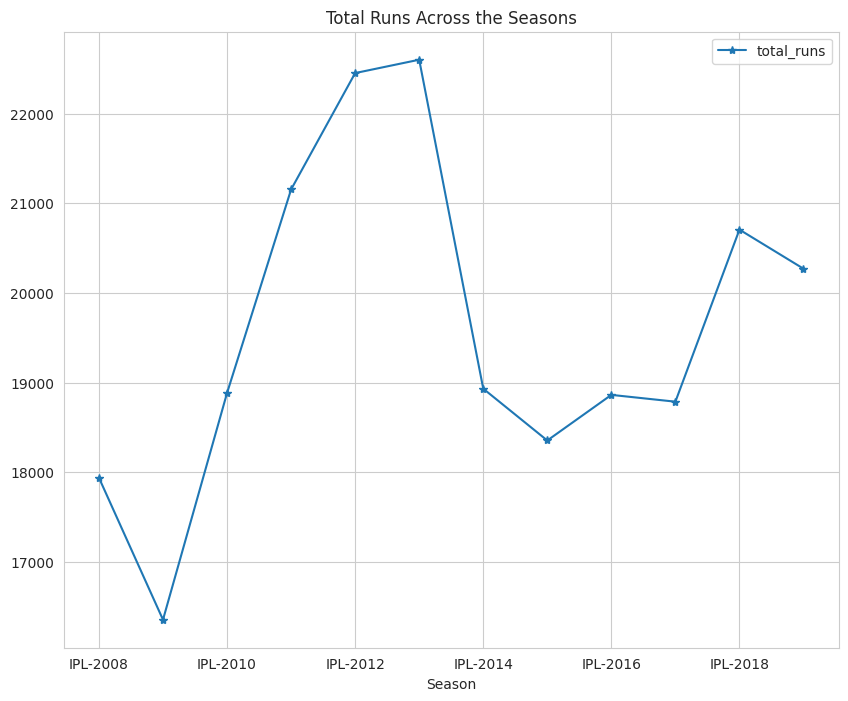

In [ ]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

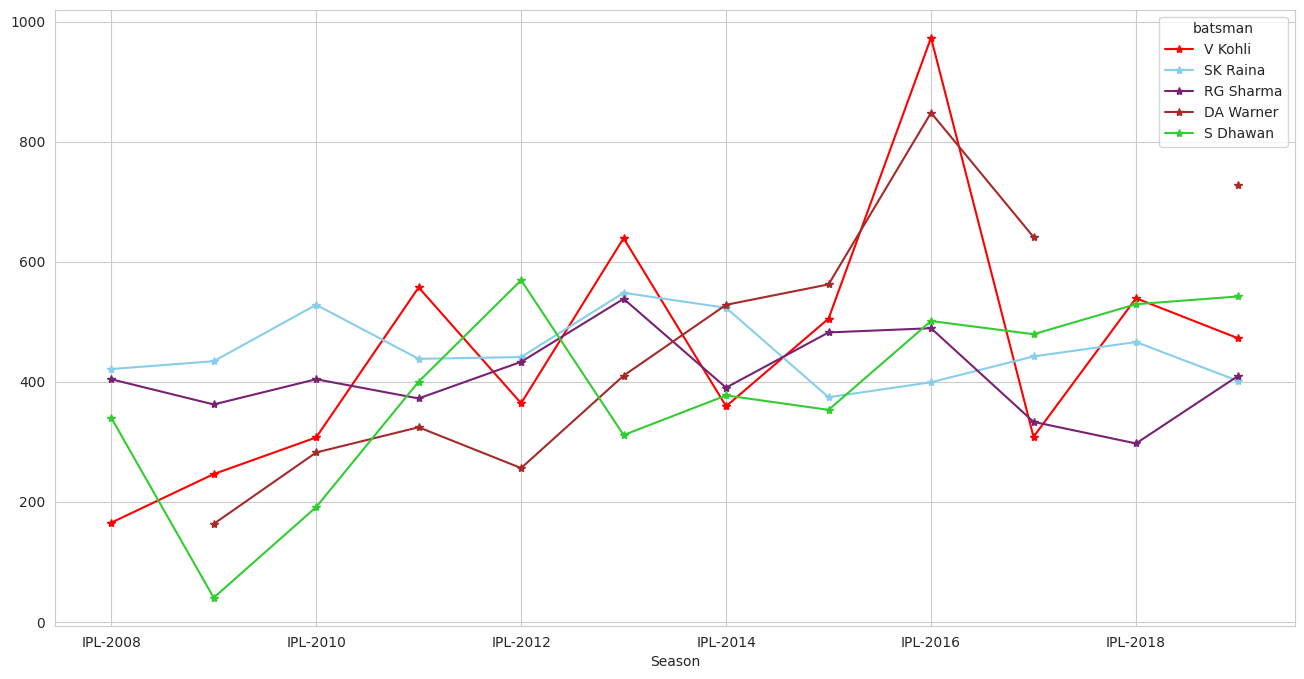

In [ ]:
men = batsmen.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['Season','batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis=1)
men = men.sort_values(by='Total',ascending=False)[:5]
men.drop('Total',axis=1,inplace=True)
men.T.plot(color=['red','skyblue','#772272','brown','limegreen'],marker='*')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

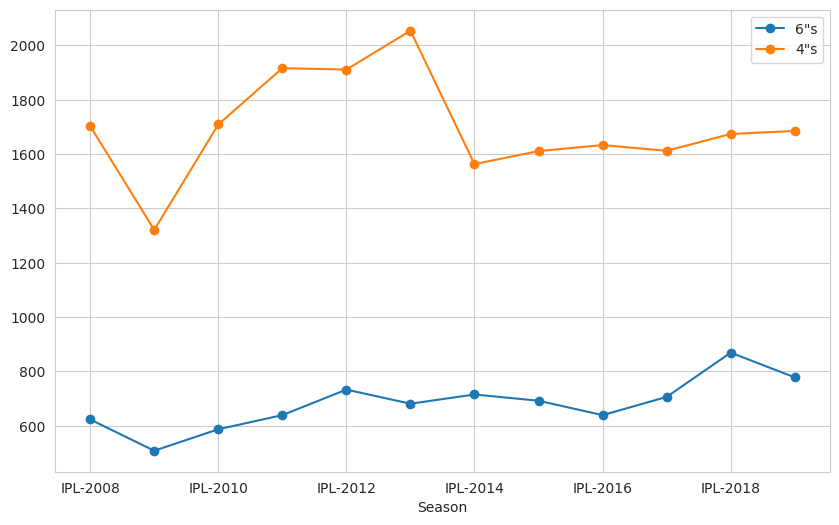

In [ ]:
Season_boundaries=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='Season',right_on='Season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('Season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

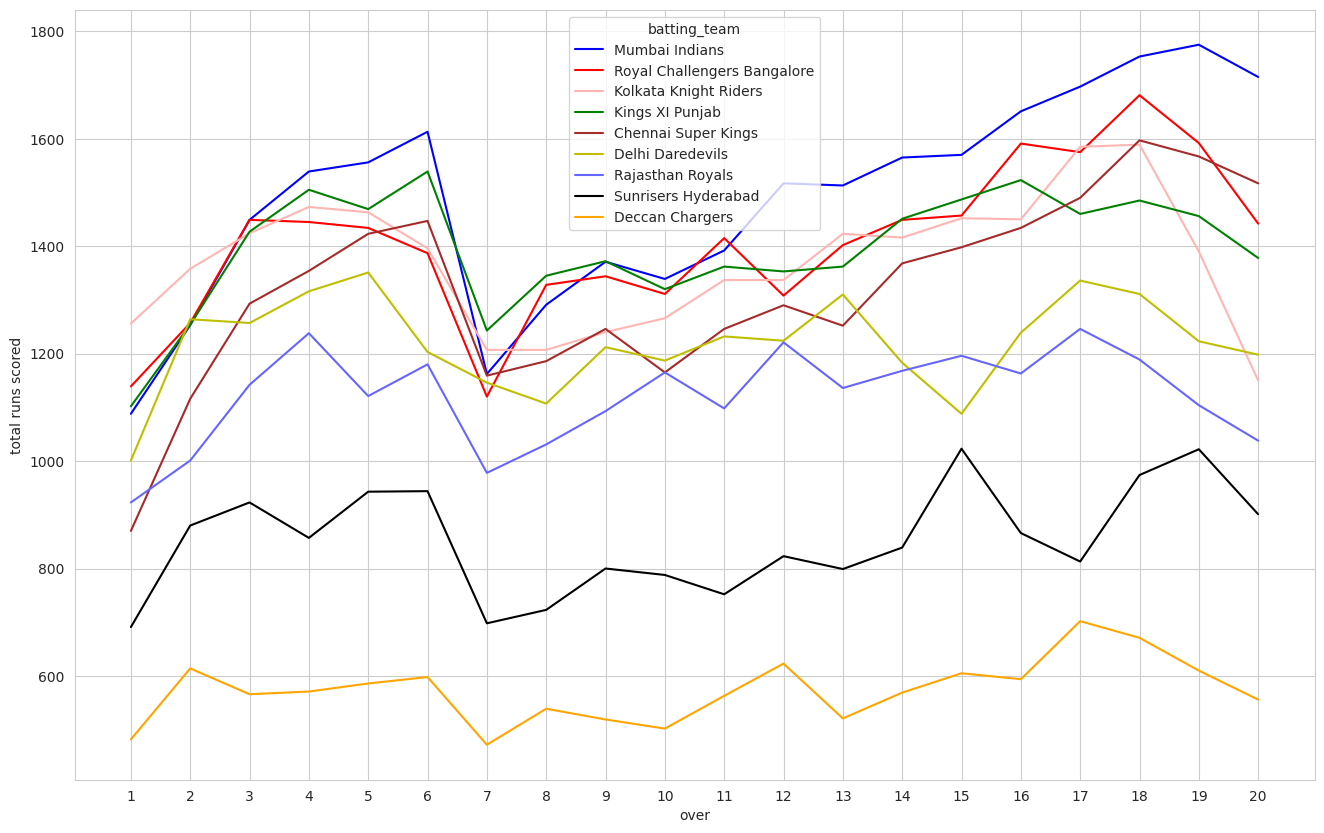

In [ ]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']

matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index('Team',inplace=True)

runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()